# Jeg prøver en konkurrence på kaggle, hvor jeg skal bruge unsupervised k-means clustering.

https://www.kaggle.com/competitions/k-means-clustering-for-heart-disease-analysis/overview

In [1]:
import pandas as pd
import numpy as np
from numpy.random import uniform
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from matplotlib.colors import ListedColormap
from time import sleep
from IPython import display

In [2]:
sns.set_style('white')
cmap = ListedColormap(sns.color_palette('Paired', 2))

# Træn model baseret på evalueringer

Jeg har prøvet forskellige måder at forberede dataen på, for at få de bedste resultater i: 
- PrepareData.ipynb

Jeg har plottet og evalueret modellen for at finde frem til de bedste parametre at træne modellen på i: 
- Plot_Voronoi.ipynb
- Inertia_Evaluation.ipynb
- Silhouette_Evaluation.ipynb

### Data mappen

I Data mappen har jeg renset og forberedt heart_disease.csv som jeg så har gemt som nu csv: heart_disease_cleaned.csv

sample.csv er et eksempel på en submission til kaggle. den indeholder de id'er som jeg skal submitte fra heart_diease.csv.

submission.csv er mine resultater som jeg submitter til kaggle.

In [3]:
data = pd.read_csv('data/heart_disease_cleaned.csv')

In [4]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1.0,0.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,1.0,0.0,1.0
1,67,1.0,0.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,2.0,3.0,2.0
2,67,1.0,0.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,2.0,2.0,3.0
3,37,1.0,0.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,1.0,0.0,2.0
4,41,0.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,3.0,0.0,2.0


### PCA transformer data

PCA reducerer mængden af features i datasættet, og beholde så meget varians som muligt.

Det gør visualiseringen af data bedre og fjerner støj i dataen.

Det kan forbedre kmeans træningen også. Jeg har testet både med og uden og fandt frem til lignende resultater, men lidt bedre evaluering med silhouette.

In [5]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

pca_x = pca_data[:, 0]
pca_y = pca_data[:, 1]

pca_data

array([[ 34.62593572,  -5.95841914],
       [ 85.42622271,  41.05263969],
       [ 29.0713946 ,   9.22259339],
       ...,
       [ 21.59636896,  35.35535457],
       [185.51999716,  10.19845122],
       [ 52.0802907 ,  44.3262284 ]])

### kmeans hyperparametre

In [6]:
kmeans_kwargs = {
"init": "k-means++",
"n_init": 15,
"random_state": 42,
}

n_clusters = 2

### Initialiser og træn modellen

In [7]:
kmeans = KMeans(n_clusters, **kmeans_kwargs)

kmeans.fit(pca_data)

print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

### Vis silhouette score

Jeg har evalueret silhouette score med flere mængder af clusters samt forskellig forberedelse af data.

referer til Silhouette_Evaluation.ipynb samt mine logs.

Har både brugt silhouette og inertia elbow method (Inertia_Evaluation.ipynb) til at finde bedste mængde af clusters.

In [8]:
print(silhouette_score(pca_data, kmeans.labels_))

0.7326338375313806


### Simpelt cluster plot

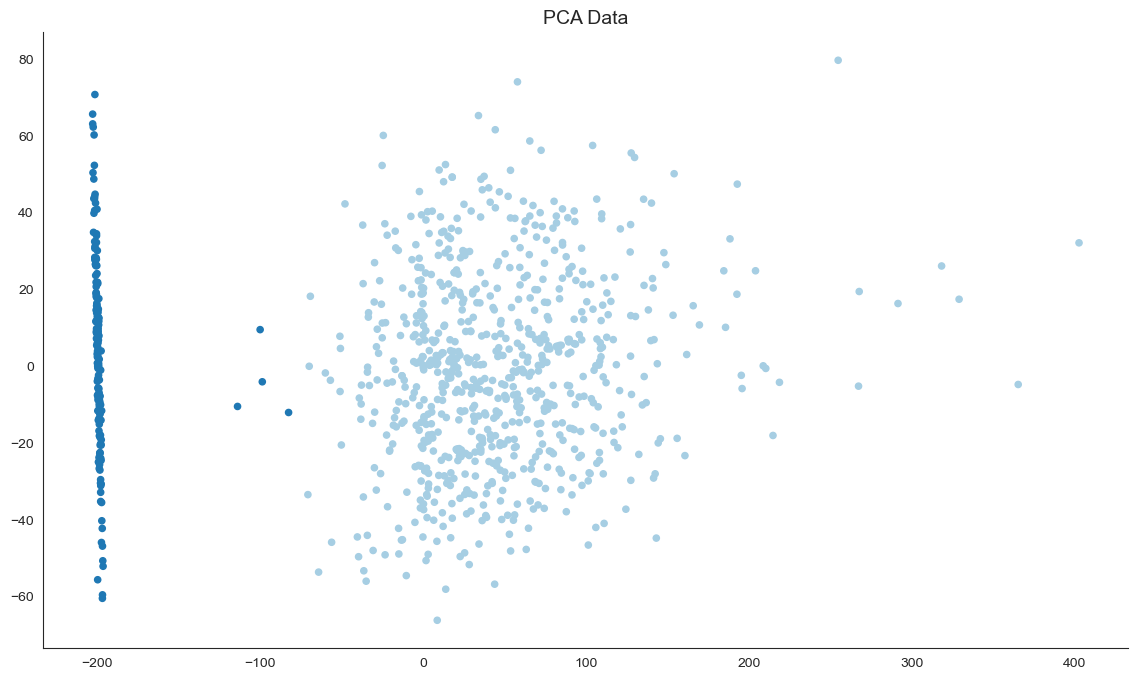

In [9]:
plt.figure(figsize=(14, 8))
plt.scatter(pca_x, pca_y, c=kmeans.labels_, s=20, cmap=cmap)
plt.title('PCA Data', fontsize=14)
sns.despine();

### Submitter resultaterne fra kmeans modellen

referer til sidste log for mere info

In [10]:
submission = pd.read_csv('data/sample.csv')
prediction = []

# Iterate over the range of IDs
for i in range(920):
    # Check if ID exists in submission
    if i in submission['id'].values:
        # Get the index of the ID in submission
        index = submission[submission['id'] == i].index[0]
        # Get the label from K-means clustering result
        label = kmeans.labels_[index]
        # Store the label in the prediction variable
        prediction.append(label)

submission['cluster'] = prediction
submission.to_csv('data/submission.csv', index=False)
submission = pd.read_csv('data/submission.csv')
submission

,id,cluster
0,0,0
1,1,0
2,3,0
3,4,0
4,7,0
...,...,...
294,910,0
295,911,0
296,912,0
297,916,0
